## CENSUS INCOME Prediction

#### Prediction task is to determine the income level for the person represented by the record. 
#### Incomes have been binned at the 50K USD level to present a binary classification problem. 


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning) 

In [2]:
os.getcwd()

'C:\\Users\\siddhi Golatkar\\Desktop\\INSOFE\\BATCH 76\\15-03-2020 text mining lab\\Assignment'

In [3]:
pd.options.display.max_columns = 100

In [4]:
colnames = ['age', 'worker class', 'industry recode', 'occupation recode', 'education', 'wage per hour', 
            'enroll in edu inst last wk', 'marital stat', 'major industry code','major occupation code',
           'race', 'hispanic origin', 'gender', 'member of a labor union', 'reason for unemployment',
           'full or part time employment stat', 'capital gains', 'capital losses', 'dividends from stocks',
           'tax filer stat', 'region of previous residence', 'state of previous residence', 
            'detailed household and family stat', 'detailed household summary in household',
            'instance weight','migration code-change in msa',
           'migration code-change in reg', 'migration code-move within reg', 'live in this house 1 year ago', 
             'migration prev res in sunbelt', 'num persons worked for employer', 
            'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 
            'citizenship', 'own business or self employed', 'VETQVA', 'VETYN', 'WKSWORK', 'year', 'income'] 
           

In [5]:
data = pd.read_csv('census-income.data.gz', names = colnames, na_values = [' ?'] ) 
test_data = pd.read_csv('census-income.test.gz', names = colnames, na_values = [ ' ?']) 

### Exploratory Data Analysis

In [6]:
data.shape

(199523, 42)

In [7]:
test_data.shape

(99762, 42)

In [8]:
data.head()

,age,worker class,industry recode,occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,gender,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,VETQVA,VETYN,WKSWORK,year,income
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [9]:
test_data.head()

,age,worker class,industry recode,occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,gender,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,VETQVA,VETYN,WKSWORK,year,income
0,38,Private,6,36,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,White,Mexican (Mexicano),Female,Not in universe,Not in universe,Full-time schedules,0,0,0,Joint one under 65 & one 65+,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1032.38,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,Mexico,Mexico,Mexico,Foreign born- Not a citizen of U S,0,Not in universe,2,12,95,- 50000.
1,44,Self-employed-not incorporated,37,12,Associates degree-occup /vocational,0,Not in universe,Married-civilian spouse present,Business and repair services,Professional specialty,White,All other,Female,Not in universe,Not in universe,PT for econ reasons usually PT,0,0,2500,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,1462.33,NaN,NaN,NaN,Not in universe under 1 year old,NaN,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,26,95,- 50000.
2,2,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1601.75,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
3,35,Private,29,3,High school graduate,0,Not in universe,Divorced,Transportation,Executive admin and managerial,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,Not in universe,Not in universe,Householder,Householder,1866.88,Nonmover,Nonmover,Nonmover,Yes,Not in universe,5,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,94,- 50000.
4,49,Private,4,34,High school graduate,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,0,Single,Not in universe,Not in universe,Secondary individual,Nonrelative of householder,1394.54,NaN,NaN,NaN,Not in universe under 1 year old,NaN,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,50,95,- 50000.


In [10]:
data.columns

Index(['age', 'worker class', 'industry recode', 'occupation recode',
       'education', 'wage per hour', 'enroll in edu inst last wk',
       'marital stat', 'major industry code', 'major occupation code', 'race',
       'hispanic origin', 'gender', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'capital gains', 'capital losses', 'dividends from stocks',
       'tax filer stat', 'region of previous residence',
       'state of previous residence', 'detailed household and family stat',
       'detailed household summary in household', 'instance weight',
       'migration code-change in msa', 'migration code-change in reg',
       'migration code-move within reg', 'live in this house 1 year ago',
       'migration prev res in sunbelt', 'num persons worked for employer',
       'family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'own business or se

In [11]:
data.dtypes

age                                          int64
worker class                                object
industry recode                              int64
occupation recode                            int64
education                                   object
wage per hour                                int64
enroll in edu inst last wk                  object
marital stat                                object
major industry code                         object
major occupation code                       object
race                                        object
hispanic origin                             object
gender                                      object
member of a labor union                     object
reason for unemployment                     object
full or part time employment stat           object
capital gains                                int64
capital losses                               int64
dividends from stocks                        int64
tax filer stat                 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   age                                      199523 non-null  int64  
 1   worker class                             199523 non-null  object 
 2   industry recode                          199523 non-null  int64  
 3   occupation recode                        199523 non-null  int64  
 4   education                                199523 non-null  object 
 5   wage per hour                            199523 non-null  int64  
 6   enroll in edu inst last wk               199523 non-null  object 
 7   marital stat                             199523 non-null  object 
 8   major industry code                      199523 non-null  object 
 9   major occupation code                    199523 non-null  object 
 10  race                            

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,199523.0,34.494199,22.310895,0.00,15.000,33.00,50.00,90.0
industry recode,199523.0,15.352320,18.067129,0.00,0.000,0.00,33.00,51.0
occupation recode,199523.0,11.306556,14.454204,0.00,0.000,0.00,26.00,46.0
wage per hour,199523.0,55.426908,274.896454,0.00,0.000,0.00,0.00,9999.0
capital gains,199523.0,434.718990,4697.531280,0.00,0.000,0.00,0.00,99999.0
capital losses,199523.0,37.313788,271.896428,0.00,0.000,0.00,0.00,4608.0
dividends from stocks,199523.0,197.529533,1984.163658,0.00,0.000,0.00,0.00,99999.0
instance weight,199523.0,1740.380269,993.768156,37.87,1061.615,1618.31,2188.61,18656.3
num persons worked for employer,199523.0,1.956180,2.365126,0.00,0.000,1.00,4.00,6.0
own business or self employed,199523.0,0.175438,0.553694,0.00,0.000,0.00,0.00,2.0


### Checking for duplicate data

In [14]:
data.duplicated().sum()

3229

In [15]:
data.loc[data.duplicated(keep = 'first'),:]

,age,worker class,industry recode,occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,gender,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,VETQVA,VETYN,WKSWORK,year,income
2784,11,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1008.22,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4967,4,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1895.32,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
5175,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,896.96,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5728,12,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,960.76,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
5935,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1898.59,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199414,1,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1807.67,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in unive

### Removing duplicate data 

In [16]:
data.drop_duplicates(keep = 'first', inplace = True)

In [17]:
data.shape

(196294, 42)

In [18]:
test_data.duplicated().sum()

883

In [19]:
test_data.loc[test_data.duplicated(keep = 'first'), : ]

,age,worker class,industry recode,occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,race,hispanic origin,gender,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,dividends from stocks,tax filer stat,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,VETQVA,VETYN,WKSWORK,year,income
6199,70,Not in universe,0,0,1st 2nd 3rd or 4th grade,0,Not in universe,Married-civilian spouse present,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Spouse of householder,Spouse of householder,993.86,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94,- 50000.
6327,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,285.27,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
6535,13,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,4714.56,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
7920,3,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,576.75,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
8262,6,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1528.37,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,95,- 50000.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99588,0,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1714.11,Not in universe,Not in universe,Not in universe,Not in universe under 1 year old,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not 

In [20]:
test_data.drop_duplicates(keep = 'first', inplace = True) 

In [21]:
test_data.shape

(98879, 42)

### Checking for missing values

In [22]:
data.isnull().sum()

age                                            0
worker class                                   0
industry recode                                0
occupation recode                              0
education                                      0
wage per hour                                  0
enroll in edu inst last wk                     0
marital stat                                   0
major industry code                            0
major occupation code                          0
race                                           0
hispanic origin                                0
gender                                         0
member of a labor union                        0
reason for unemployment                        0
full or part time employment stat              0
capital gains                                  0
capital losses                                 0
dividends from stocks                          0
tax filer stat                                 0
region of previous r

In [23]:
missing = data.isnull().sum() *100 / len(data)
missing = missing [missing > 0]
missing.sort_values(inplace = True)
missing

state of previous residence        0.360174
country of birth self              1.726492
country of birth mother            3.111150
country of birth father            3.414776
migration code-change in msa      49.932754
migration code-change in reg      49.932754
migration code-move within reg    49.932754
migration prev res in sunbelt     49.932754
dtype: float64

In [24]:
#test_data.isnull().sum()

In [25]:
for x in colnames :
    print(x, '--------->>', data[x].nunique(),'----', '\n', data[x].unique(), '\n')

age --------->> 91 ---- 
 [73 58 18  9 10 48 42 28 47 34  8 32 51 46 26 13 39 16 35 12 27 56 55  2
  1 37  4 63 25 81 11 30  7 66 84 52  5 36 72 61 41 90 49  6  0 33 57 50
 24 17 53 40 54 22 29 85 38 76 21 31 74 19 15  3 43 68 71 45 62 23 69 75
 44 59 60 64 65 70 67 78 20 14 83 86 89 77 79 82 80 87 88] 

worker class --------->> 9 ---- 
 [' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay'] 

industry recode --------->> 52 ---- 
 [ 0  4 40 34 43 37 24 39 12 35 45  3 19 29 32 48 33 23 44 36 31 30 41  5
 11  9 42  6 18 50  2  1 26 47 16 14 22 17  7  8 25 46 27 15 13 49 38 21
 28 20 51 10] 

occupation recode --------->> 47 ---- 
 [ 0 34 10  3 40 26 37 31 12 36 41 22  2 35 25 23 42  8 19 29 27 16 33 13
 18  9 17 39 32 11 30 38 20  7 21 44 24 43 28  4  1  6 45 14  5 15 46] 

education --------->> 17 ---- 
 [' High school graduate' ' Some college but no de

migration code-change in msa --------->> 9 ---- 
 [nan ' MSA to MSA' ' Nonmover' ' NonMSA to nonMSA' ' Not in universe'
 ' Not identifiable' ' Abroad to MSA' ' MSA to nonMSA' ' Abroad to nonMSA'
 ' NonMSA to MSA'] 

migration code-change in reg --------->> 8 ---- 
 [nan ' Same county' ' Nonmover' ' Different region'
 ' Different county same state' ' Not in universe'
 ' Different division same region' ' Abroad'
 ' Different state same division'] 

migration code-move within reg --------->> 9 ---- 
 [nan ' Same county' ' Nonmover' ' Different state in South'
 ' Different county same state' ' Not in universe'
 ' Different state in Northeast' ' Abroad' ' Different state in Midwest'
 ' Different state in West'] 

live in this house 1 year ago --------->> 3 ---- 
 [' Not in universe under 1 year old' ' No' ' Yes'] 

migration prev res in sunbelt --------->> 3 ---- 
 [nan ' Yes' ' Not in universe' ' No'] 

num persons worked for employer --------->> 7 ---- 
 [0 1 6 4 5 3 2] 

family members u

### Our target variable is a string, we will convert it to numeric code - 0 or 1.

In [26]:
data.income = data.income.astype('category').cat.codes

In [27]:
data.income[:5]

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int8

In [28]:
test_data.income = test_data.income.astype('category').cat.codes

In [29]:
test_data.income.value_counts() * 100 / len(test_data)

0    93.743869
1     6.256131
Name: income, dtype: float64

### Let us check the distribution of our target variable.

In [30]:
data.income.value_counts() * 100 / len(data)

0    93.692115
1     6.307885
Name: income, dtype: float64

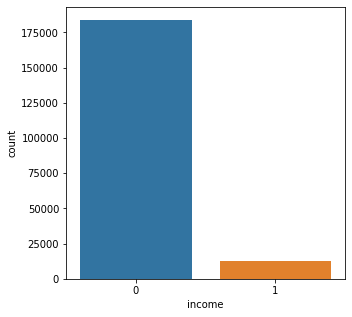

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(x = data['income'])

In [32]:
data.income.value_counts()

0    183912
1     12382
Name: income, dtype: int64

In [33]:
data.drop(['migration code-change in msa', 'migration code-change in reg',
           'migration code-move within reg', 'migration prev res in sunbelt','year', 'race', 
           'hispanic origin', 'region of previous residence','state of previous residence', 
           'country of birth father', 'country of birth mother', 'country of birth self',
           'VETQVA', 'enroll in edu inst last wk', 'citizenship', 'live in this house 1 year ago',
           'detailed household and family stat', 'detailed household summary in household',
           'family members under 18', 'reason for unemployment'], axis = 1, inplace = True)
data.shape

(196294, 22)

In [34]:
test_data.drop(['migration code-change in msa', 'migration code-change in reg',
                'migration code-move within reg', 'migration prev res in sunbelt', 'year', 'race', 
                'hispanic origin', 'region of previous residence','state of previous residence',
                'country of birth father', 'country of birth mother', 'country of birth self',
                'VETQVA', 'enroll in edu inst last wk', 'citizenship', 'live in this house 1 year ago',
                'detailed household and family stat', 'detailed household summary in household',
                'family members under 18', 'reason for unemployment'], axis = 1, inplace = True)
test_data.shape

(98879, 22)

In [35]:
num_cols = ['age', 'industry recode', 'occupation recode', 'wage per hour', 'capital gains', 'capital losses', 
            'dividends from stocks', 'WKSWORK', 'own business or self employed', 'num persons worked for employer',
            'instance weight', 'VETYN']
num_cols

['age',
 'industry recode',
 'occupation recode',
 'wage per hour',
 'capital gains',
 'capital losses',
 'dividends from stocks',
 'WKSWORK',
 'own business or self employed',
 'num persons worked for employer',
 'instance weight',
 'VETYN']

In [36]:
cat_cols = data.columns[~data.columns.isin(num_cols)]
cat_cols = cat_cols.drop('income')
cat_cols

Index(['worker class', 'education', 'marital stat', 'major industry code',
       'major occupation code', 'gender', 'member of a labor union',
       'full or part time employment stat', 'tax filer stat'],
      dtype='object')

In [37]:
data[cat_cols] = data[cat_cols].astype("category")

test_data[cat_cols] = test_data[cat_cols].astype('category')


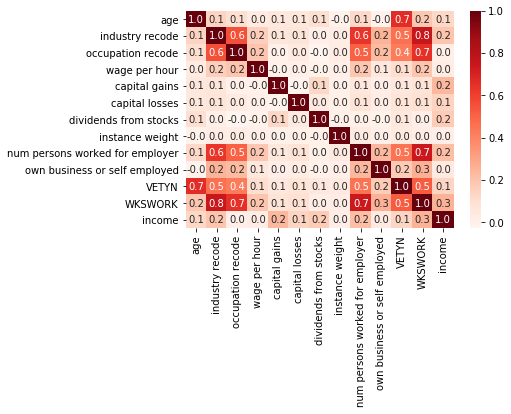

In [38]:
sns.heatmap(data.corr(), annot = True, cmap = "Reds", fmt = ".1f")

### Feature Engineering

In [39]:
data["agebin"] = pd.cut(x = data["age"],bins = [0,18,30,45,60,95],labels = ["Young", "Adult", "Middle Age","Old","Very Old" ])

In [40]:
data.drop("age",axis = 1, inplace = True)

In [41]:
data['other income'] = data['capital gains'] - data['capital losses'] + data['dividends from stocks']

In [42]:
data.drop(['capital gains', 'capital losses', 'dividends from stocks'], axis = 1, inplace = True)

In [43]:
data['wage per day'] = data['wage per hour'] * 8

In [44]:
data['wage per week'] = data['wage per day'] * 7

In [45]:
data['total_wages'] = data['wage per week'] * data['WKSWORK']

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196294 entries, 0 to 199522
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   worker class                       196294 non-null  category
 1   industry recode                    196294 non-null  int64   
 2   occupation recode                  196294 non-null  int64   
 3   education                          196294 non-null  category
 4   wage per hour                      196294 non-null  int64   
 5   marital stat                       196294 non-null  category
 6   major industry code                196294 non-null  category
 7   major occupation code              196294 non-null  category
 8   gender                             196294 non-null  category
 9   member of a labor union            196294 non-null  category
 10  full or part time employment stat  196294 non-null  category
 11  tax filer stat            

In [47]:
data.agebin.isnull().sum()

2643

In [48]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
industry recode,196294.0,15.603187,18.106401,0.00,0.00,1.000,33.00,51.0
occupation recode,196294.0,11.490468,14.498128,0.00,0.00,2.000,26.00,46.0
wage per hour,196294.0,56.336505,277.054333,0.00,0.00,0.000,0.00,9999.0
instance weight,196294.0,1743.267584,996.945985,37.87,1061.53,1620.175,2194.06,18656.3
num persons worked for employer,196294.0,1.988105,2.371018,0.00,0.00,1.000,4.00,6.0
own business or self employed,196294.0,0.178304,0.557739,0.00,0.00,0.000,0.00,2.0
VETYN,196294.0,1.538183,0.836813,0.00,2.00,2.000,2.00,2.0
WKSWORK,196294.0,23.553889,24.428588,0.00,0.00,12.000,52.00,52.0
income,196294.0,0.063079,0.243105,0.00,0.00,0.000,0.00,1.0
other income,196294.0,604.664829,5383.111555,-4608.00,0.00,0.000,0.00,199998.0


### Data Cleaning

### Applying filter to reconcile whether data is correctly classified in Income Column

In [49]:
data[(data.income == 0 ) & (data.total_wages >= 50000) & (data.agebin == 'Young')]

,worker class,industry recode,occupation recode,education,wage per hour,marital stat,major industry code,major occupation code,gender,member of a labor union,full or part time employment stat,tax filer stat,instance weight,num persons worked for employer,own business or self employed,VETYN,WKSWORK,income,agebin,other income,wage per day,wage per week,total_wages
156,Private,33,19,11th grade,475,Never married,Retail trade,Sales,Male,No,Full-time schedules,Single,2170.36,2,2,2,50,0,Young,0,3800,26600,1330000
868,Private,40,32,11th grade,500,Never married,Entertainment,Other service,Male,No,Children or Armed Forces,Single,2442.42,3,0,2,52,0,Young,0,4000,28000,1456000
1060,Private,33,29,10th grade,600,Never married,Retail trade,Other service,Male,No,Children or Armed Forces,Single,1045.60,2,0,2,36,0,Young,0,4800,33600,1209600
3065,Private,15,37,11th grade,700,Never married,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,Male,No,Children or Armed Forces,Single,1305.62,2,0,2,46,0,Young,0,5600,39200,1803200
3219,Private,33,19,12th grade no diploma,485,Never married,Retail trade,Sales,Female,No,Children or Armed Forces,Single,769.21,1,0,2,52,0,Young,0,3880,27160,1412320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198229,Private,33,35,11th grade,465,Never married,Retail trade,Precision production craft & repair,Male,No,Children or Armed Forces,Single,1933.22,3,2,2,28,0,Young,0,3720,26040,729120
198614,Private,33,29,11th grade,450,Never married,Retail trade,Other service,Male,No,Full-time schedules,Single,354.44,6,2,2,24,0,Young,0,3600,25200,604800
198658,Private,33,29,9th grade,525,Never married,Retail trade,Other service,Male,No,Full-time schedules,Single,3004.34,2,0,2,52,0,Young,0,4200,29400,1528800
198675,Private,44,29,11th grade,485,Never married,Social services,Other service,Male,No,Children or Armed Forces,Single,697.85,4,0,2,52,0,Young,0,3880,27160,1412320


In [50]:
data.shape

(196294, 23)

In [51]:
data = data[~((data.income == 0 ) & (data.total_wages >= 50000) & (data.agebin == 'Young'))]

In [52]:
data.shape

(195718, 23)

In [53]:
data[(data.income == 1 ) & (data.total_wages >= 50000) & (data.agebin == 'Young')]

,worker class,industry recode,occupation recode,education,wage per hour,marital stat,major industry code,major occupation code,gender,member of a labor union,full or part time employment stat,tax filer stat,instance weight,num persons worked for employer,own business or self employed,VETYN,WKSWORK,income,agebin,other income,wage per day,wage per week,total_wages
29565,Private,33,29,12th grade no diploma,550,Never married,Retail trade,Other service,Male,No,PT for non-econ reasons usually FT,Single,1819.47,1,1,2,52,1,Young,14084,4400,30800,1601600


In [54]:
data[(data.income == 0 ) & (data.total_wages >= 50000)]

,worker class,industry recode,occupation recode,education,wage per hour,marital stat,major industry code,major occupation code,gender,member of a labor union,full or part time employment stat,tax filer stat,instance weight,num persons worked for employer,own business or self employed,VETYN,WKSWORK,income,agebin,other income,wage per day,wage per week,total_wages
5,Private,40,10,Some college but no degree,1200,Married-civilian spouse present,Entertainment,Professional specialty,Female,No,Full-time schedules,Joint both under 65,162.61,1,2,2,52,0,Old,0,9600,67200,3494400
8,Local government,43,26,Some college but no degree,876,Married-civilian spouse present,Education,Adm support including clerical,Female,No,Full-time schedules,Joint both under 65,1661.53,5,0,2,52,0,Old,0,7008,49056,2550912
22,Private,35,22,Some college but no degree,500,Married-civilian spouse present,Finance insurance and real estate,Adm support including clerical,Female,No,Full-time schedules,Joint both under 65,1500.08,2,2,2,32,0,Old,0,4000,28000,896000
49,Private,37,36,Some college but no degree,400,Married-civilian spouse present,Business and repair services,Machine operators assmblrs & inspctrs,Male,No,Full-time schedules,Joint both 65+,1212.48,2,0,2,52,0,Very Old,0,3200,22400,1164800
147,State government,43,23,Associates degree-occup /vocational,450,Married-A F spouse present,Education,Adm support including clerical,Female,No,Children or Armed Forces,Joint both under 65,263.45,1,2,2,48,0,Adult,0,3600,25200,1209600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199410,Private,33,16,Bachelors degree(BA AB BS),1057,Married-civilian spouse present,Retail trade,Sales,Female,No,Children or Armed Forces,Joint both under 65,3179.49,6,0,2,52,0,Adult,0,8456,59192,3077984
199438,Federal government,29,25,High school graduate,1100,Never married,Transportation,Adm support including clerical,Male,Yes,Children or Armed Forces,Single,1932.81,6,0,2,52,0,Old,0,8800,61600,3203200
199439,State government,50,1,High school graduate,1195,Married-civilian spouse present,Public administration,Executive admin and managerial,Female,Yes,Children or Armed Forces,Joint both under 65,704.16,1,0,2,52,0,Old,0,9560,66920,3479840
199441,Federal government,31,35,Some college but no degree,1675,Married-civilian spouse present,Utilities and sanitary services,Precision production craft & repair,Male,Yes,Full-time schedules,Joint both under 65,2127.55,6,0,2,52,0,Very Old,0,13400,93800,4877600


In [55]:
data = data[~((data.income == 0 ) & (data.total_wages >= 50000))]

In [56]:
data.drop(['wage per day', 'wage per hour', 'wage per week'], axis = 1, inplace = True)

### Feature Engineering on Test Data

In [57]:
test_data["agebin"] = pd.cut(x = test_data["age"],bins = [0,18,30,45,60,95],
                             labels = ["Young", "Adult", "Middle Age","Old","Very Old" ])

In [58]:
test_data.drop("age",axis = 1, inplace = True)

In [59]:
test_data['other income'] = test_data['capital gains'] - test_data['capital losses'] + test_data['dividends from stocks']

In [60]:
test_data.drop(['capital gains', 'capital losses', 'dividends from stocks'], axis = 1, inplace = True)

In [61]:
test_data['wage per day'] = test_data['wage per hour'] * 8

In [62]:
test_data['wage per week'] = test_data['wage per day'] * 7

In [63]:
test_data['total_wages'] = test_data['wage per week'] * test_data['WKSWORK']

In [64]:
test_data[(test_data.income == 0 ) & (test_data.total_wages >= 50000) & (test_data.agebin == 'Young')]

,worker class,industry recode,occupation recode,education,wage per hour,marital stat,major industry code,major occupation code,gender,member of a labor union,full or part time employment stat,tax filer stat,instance weight,num persons worked for employer,own business or self employed,VETYN,WKSWORK,income,agebin,other income,wage per day,wage per week,total_wages
109,Private,43,26,Some college but no degree,438,Never married,Education,Adm support including clerical,Female,No,Full-time schedules,Single,838.57,4,2,2,40,0,Young,0,3504,24528,981120
143,Private,33,29,High school graduate,425,Never married,Retail trade,Other service,Female,No,Children or Armed Forces,Nonfiler,2097.16,6,2,2,6,0,Young,0,3400,23800,142800
806,Local government,43,23,11th grade,525,Never married,Education,Adm support including clerical,Female,No,Children or Armed Forces,Single,1442.26,6,2,2,24,0,Young,-1602,4200,29400,705600
1184,Private,44,32,11th grade,500,Never married,Social services,Other service,Male,No,Children or Armed Forces,Single,2591.99,6,0,2,35,0,Young,0,4000,28000,980000
1414,Private,40,32,9th grade,425,Never married,Entertainment,Other service,Female,No,Children or Armed Forces,Nonfiler,3356.47,2,0,2,20,0,Young,0,3400,23800,476000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98522,Private,40,32,12th grade no diploma,400,Never married,Entertainment,Other service,Female,No,Children or Armed Forces,Single,1912.12,2,0,2,52,0,Young,0,3200,22400,1164800
98695,Local government,43,26,11th grade,500,Never married,Education,Adm support including clerical,Female,No,Full-time schedules,Single,746.83,4,0,2,40,0,Young,0,4000,28000,1120000
98852,Private,33,19,11th grade,450,Never married,Retail trade,Sales,Female,No,Children or Armed Forces,Single,4571.36,6,2,2,12,0,Young,0,3600,25200,302400
99000,Private,33,19,10th grade,435,Never married,Retail trade,Sales,Female,No,Children or Armed Forces,Single,1634.16,2,0,2,52,0,Young,0,3480,24360,1266720


In [65]:
test_data.shape

(98879, 23)

In [66]:
test_data = test_data[~((test_data.income == 0 ) & (test_data.total_wages >= 50000) & (test_data.agebin == 'Young'))]

In [67]:
test_data.shape

(98596, 23)

In [68]:
test_data[(test_data.income == 1 ) & (test_data.total_wages >= 50000) & (test_data.agebin == 'Young')]

,worker class,industry recode,occupation recode,education,wage per hour,marital stat,major industry code,major occupation code,gender,member of a labor union,full or part time employment stat,tax filer stat,instance weight,num persons worked for employer,own business or self employed,VETYN,WKSWORK,income,agebin,other income,wage per day,wage per week,total_wages


In [69]:
test_data.drop(['wage per day', 'wage per hour', 'wage per week'], axis = 1, inplace = True)

In [70]:
test_data[(test_data.income == 0 ) & (test_data.total_wages >= 50000)]

,worker class,industry recode,occupation recode,education,marital stat,major industry code,major occupation code,gender,member of a labor union,full or part time employment stat,tax filer stat,instance weight,num persons worked for employer,own business or self employed,VETYN,WKSWORK,income,agebin,other income,total_wages
13,Private,33,29,Some college but no degree,Never married,Retail trade,Other service,Male,No,Children or Armed Forces,Single,2130.21,6,0,2,17,0,Adult,0,404600
24,Private,33,16,Some college but no degree,Married-civilian spouse present,Retail trade,Sales,Male,No,Children or Armed Forces,Joint both under 65,499.39,1,0,2,52,0,Middle Age,7500,2708160
69,Private,24,17,Bachelors degree(BA AB BS),Married-civilian spouse present,Manufacturing-nondurable goods,Sales,Male,No,Children or Armed Forces,Joint both under 65,1331.52,2,0,2,52,0,Old,0,2038400
74,Local government,47,28,High school graduate,Married-civilian spouse present,Public administration,Protective services,Male,Yes,Full-time schedules,Joint both under 65,2772.85,6,0,2,52,0,Middle Age,0,3575936
78,Private,39,36,7th and 8th grade,Married-civilian spouse present,Personal services except private HH,Machine operators assmblrs & inspctrs,Female,No,Children or Armed Forces,Joint both under 65,2151.95,1,0,2,52,0,Middle Age,0,1820000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99695,Private,33,29,10th grade,Never married,Retail trade,Other service,Female,No,Full-time schedules,Single,2370.37,6,0,2,52,0,Adult,0,1601600
99697,Private,23,21,Some college but no degree,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,Male,No,Full-time schedules,Joint both under 65,3561.27,6,0,2,52,0,Middle Age,0,3276000
99724,Private,40,32,High school graduate,Never married,Entertainment,Other service,Male,No,PT for econ reasons usually FT,Single,1535.78,6,2,2,45,0,Adult,0,1071000
99735,Private,40,31,High school graduate,Married-civilian spouse present,Entertainment,Other service,Female,No,Full-time schedules,Joint both under 65,2853.07,6,0,2,52,0,Middle Age,0,2987712


In [71]:
test_data = test_data[~((test_data.income == 0 ) & (test_data.total_wages >= 50000))]

In [72]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93706 entries, 0 to 99761
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   worker class                       93706 non-null  category
 1   industry recode                    93706 non-null  int64   
 2   occupation recode                  93706 non-null  int64   
 3   education                          93706 non-null  category
 4   marital stat                       93706 non-null  category
 5   major industry code                93706 non-null  category
 6   major occupation code              93706 non-null  category
 7   gender                             93706 non-null  category
 8   member of a labor union            93706 non-null  category
 9   full or part time employment stat  93706 non-null  category
 10  tax filer stat                     93706 non-null  category
 11  instance weight                    93706 

In [73]:
data.shape

(185847, 20)

In [74]:
test_data.shape

(93706, 20)

### Imputation

In [75]:
from sklearn.impute import SimpleImputer

cat_imputer = SimpleImputer(strategy='most_frequent')

In [76]:
cat_none = ['agebin']

In [77]:
cat_imputer.fit(data[cat_none])

data[cat_none] = cat_imputer.transform(data[cat_none]) 

In [78]:
cat_imputer.fit(test_data[cat_none])

test_data[cat_none] = cat_imputer.transform(test_data[cat_none]) 


In [79]:
data.isnull().sum()

worker class                         0
industry recode                      0
occupation recode                    0
education                            0
marital stat                         0
major industry code                  0
major occupation code                0
gender                               0
member of a labor union              0
full or part time employment stat    0
tax filer stat                       0
instance weight                      0
num persons worked for employer      0
own business or self employed        0
VETYN                                0
WKSWORK                              0
income                               0
agebin                               0
other income                         0
total_wages                          0
dtype: int64

In [80]:
test_data.isnull().sum()

worker class                         0
industry recode                      0
occupation recode                    0
education                            0
marital stat                         0
major industry code                  0
major occupation code                0
gender                               0
member of a labor union              0
full or part time employment stat    0
tax filer stat                       0
instance weight                      0
num persons worked for employer      0
own business or self employed        0
VETYN                                0
WKSWORK                              0
income                               0
agebin                               0
other income                         0
total_wages                          0
dtype: int64

In [81]:
cat_cols =  ['worker class', 'education', 'marital stat', 'major industry code',
             'major occupation code', 'gender', 'member of a labor union',
             'full or part time employment stat', 'tax filer stat','agebin']

In [82]:
for x in cat_cols :
    print(x, '--------->>', data[x].nunique(),'----', '\n', data[x].unique(), '\n')

worker class --------->> 9 ---- 
 [Not in universe, Self-employed-not incorporated, Private, Federal government, Self-employed-incorporated, State government, Local government, Never worked, Without pay]
Categories (9, object): [Not in universe, Self-employed-not incorporated, Private, Federal government, ..., State government, Local government, Never worked, Without pay] 

education --------->> 17 ---- 
 [High school graduate, Some college but no degree, 10th grade, Children, Bachelors degree(BA AB BS), ..., 5th or 6th grade, 11th grade, Doctorate degree(PhD EdD), 9th grade, 1st 2nd 3rd or 4th grade]
Length: 17
Categories (17, object): [High school graduate, Some college but no degree, 10th grade, Children, ..., 11th grade, Doctorate degree(PhD EdD), 9th grade, 1st 2nd 3rd or 4th grade] 

marital stat --------->> 7 ---- 
 [Widowed, Divorced, Never married, Married-civilian spouse present, Separated, Married-spouse absent, Married-A F spouse present]
Categories (7, object): [Widowed, D

## Train-Validation Split

In [83]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(data, test_size = 0.3, random_state = 1234)

In [84]:
print("Shape of training set:", train.shape)
print("Shape of validation set:", valid.shape)
print("Shape of test_data set:", test_data.shape)

Shape of training set: (130092, 20)
Shape of validation set: (55755, 20)
Shape of test_data set: (93706, 20)


In [85]:
X_train = train.drop('income', axis = 1)
y_train = train['income']

X_valid = valid.drop('income', axis = 1)
y_valid = valid['income']

In [86]:
X_test = test_data.drop(['income'], axis = 1)
y_test = test_data['income']

In [87]:
X_train = pd.get_dummies(X_train, columns = cat_cols, drop_first = True)
X_valid = pd.get_dummies(X_valid, columns = cat_cols, drop_first = True) 
X_test = pd.get_dummies(X_test, columns = cat_cols, drop_first = True) 


In [88]:
print(X_train.shape)

print(X_valid.shape)

print(X_test.shape)

(130092, 95)
(55755, 95)
(93706, 95)


## Model Building

In [89]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix 

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

### Logistic Regression

In [92]:
LR = LogisticRegression(random_state = 1)

LR.fit(X_train, y_train)

y_pred_LR_train = LR.predict(X_train)
y_pred_LR_valid = LR.predict(X_valid)

cr_lr_train=classification_report(y_train,y_pred_LR_train)
cr_lr_valid=classification_report(y_valid,y_pred_LR_valid)

print('Train Classification Report')
print(cr_lr_train)

print('Validation Classification Report')
print(cr_lr_valid)


Train Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    121430
           1       0.77      0.23      0.35      8662

    accuracy                           0.94    130092
   macro avg       0.86      0.61      0.66    130092
weighted avg       0.94      0.94      0.93    130092

Validation Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     52035
           1       0.76      0.23      0.35      3720

    accuracy                           0.94     55755
   macro avg       0.86      0.61      0.66     55755
weighted avg       0.94      0.94      0.93     55755



In [93]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
DT=DecisionTreeClassifier()

DT.fit(X_train,y_train)

y_pred_DT_train=DT.predict(X_train)
y_pred_DT_valid=DT.predict(X_valid)

cr_dt_train=classification_report(y_train,y_pred_DT_train)
cr_dt_valid=classification_report(y_valid,y_pred_DT_valid)

print('Train Classification Report')
print(cr_dt_train)
print('Validation Classification Report')
print(cr_dt_valid)


Train Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    121430
           1       1.00      1.00      1.00      8662

    accuracy                           1.00    130092
   macro avg       1.00      1.00      1.00    130092
weighted avg       1.00      1.00      1.00    130092

Validation Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     52035
           1       0.47      0.50      0.48      3720

    accuracy                           0.93     55755
   macro avg       0.72      0.73      0.72     55755
weighted avg       0.93      0.93      0.93     55755

